In [1]:
import numpy as np
import pandas as pd

In [2]:
zoo = pd.read_csv('zoo.csv')
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [3]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null bool
feathers       101 non-null bool
eggs           101 non-null bool
milk           101 non-null bool
airborne       101 non-null bool
aquatic        101 non-null bool
predator       101 non-null bool
toothed        101 non-null bool
backbone       101 non-null bool
breathes       101 non-null bool
venomous       101 non-null bool
fins           101 non-null bool
legs           101 non-null int64
tail           101 non-null bool
domestic       101 non-null bool
catsize        101 non-null bool
type           101 non-null object
dtypes: bool(15), int64(1), object(2)
memory usage: 3.9+ KB


In [4]:
zoo = zoo.drop(columns=['animal_name'])
X = zoo.drop(columns=['type'])
y = zoo.type

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [7]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
y_pred = dt.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", round(acc*100, 2), "%")

Accuracy on test set:  95.24 %


In [10]:
# Unknown data (animal_name: Woolly Mammoth)
ud = [{'hair':True, 'feathers':False, 'eggs':False, 'milk':True, 'airborne':False, 
       'aquatic':False, 'predator':False, 'toothed':True, 'backbone':True, 'breathes':True, 'venomous':False, 
       'fins':False, 'legs':4, 'tail':True, 'domestic':False, 'catsize':False}]
df = pd.DataFrame(data=ud)

In [11]:
y_ud = dt.predict(df)
print("Type of animal: ", y_ud)

Type of animal:  ['mammal']


In [12]:
from sklearn import tree
from IPython.display import Image
import pydotplus

In [16]:
targets = zoo.type.value_counts()
targets

mammal           41
bird             20
fish             13
mollusc.et.al    10
insect            8
reptile           5
amphibian         4
Name: type, dtype: int64

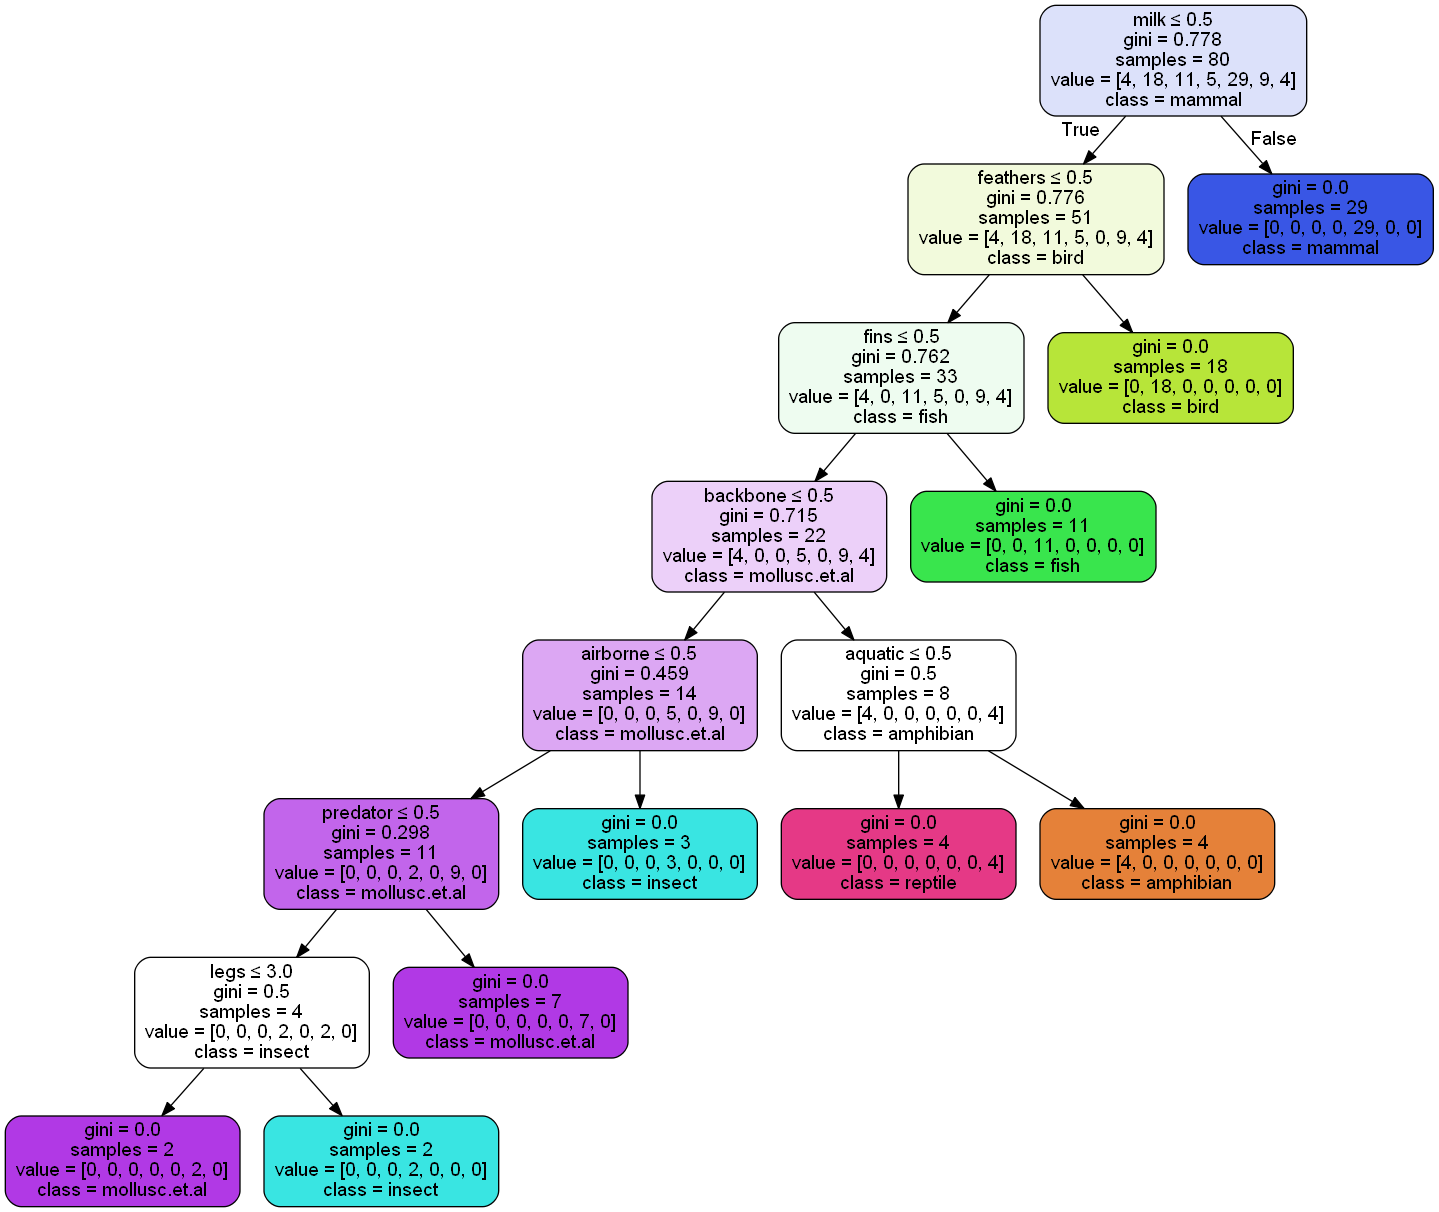

In [45]:
dot_data = tree.export_graphviz(dt,
                                out_file = None, 
                                feature_names=X.columns,
                                class_names=['amphibian', 'bird', 'fish', 'insect', 'mammal', 'mollusc.et.al',  'reptile'],
                                filled=True,
                                rounded=True,
                                special_characters=True)
dtree = pydotplus.graph_from_dot_data(dot_data)
Image(dtree.create_png())

## Milk is the root node